<a href="https://colab.research.google.com/github/shaneahmed/StatswithPython/blob/main/03-DataVisualisation.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://kaggle.com/kernels/welcome?src=https://github.com/shaneahmed/StatswithPython/blob/main/03-DataVisualisation.ipynb" target="_blank"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/></a>

# Data Visualisation Techniques

### by Shan E Ahmed Raza
---



**Name: (Please write your name and ID here prior to submission)**



---
In this notebook we will focus on data visualisation techniques using python. We will mainly work with three python packages pandas, seaborn and matplotlib. We will also consider calculating skewness, kurtosis and correlation between multiple variables.


Let's start with installing required libraries.

In [1]:
!pip install pandas seaborn matplotlib scipy

Import required libraries

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

We will start with loading builtin data set `iris` in `seaborn` package. The [iris (Fisher data set)](https://archive.ics.uci.edu/ml/datasets/iris) is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The data set has following attributes:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:\
    -- Iris Setosa\
    -- Iris Versicolour\
    -- Iris Virginica

In [3]:
iris = sns.load_dataset('iris')

Let's have a look at the data set

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Distribution
Let's plot distribution of sepal length for the whole data set.

### Histogram

Text(0.5, 1.0, 'Sepal Histogram')

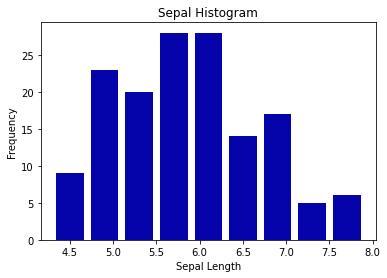

In [5]:
n, bins, patches = plt.hist(x=iris['sepal_length'], bins='auto', color='#0504aa', rwidth=0.80)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Sepal Histogram')

    The y-axis is the grouped frequency distribution of sepal length. Try changing the bin size to experiment with class interval.

### Density Plot
A density plot is a smooth continuous version of a histogram estimated from data. We discussed about skewness and kurtosis.

Kurtosis = -0.5735679489249765
Skewness = 0.3117530585022963


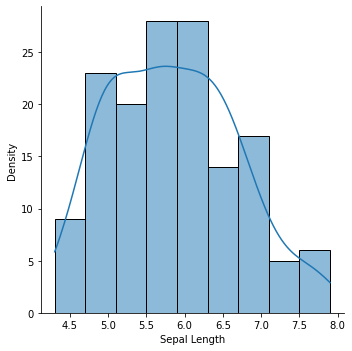

In [6]:
ax = sns.displot(iris['sepal_length'], kde=True)
_ = ax.set(xlabel='Sepal Length', ylabel='Density')
print("Kurtosis = " + str(stats.kurtosis(iris['sepal_length']))) # Display kurtosis
print("Skewness = " + str(stats.skew(iris['sepal_length']))) # Display Skewness 

    Try comparing skewness and kurtosis for the remaining variables with the shape of distribution. 

    You can plot density plot without showing the histogram.

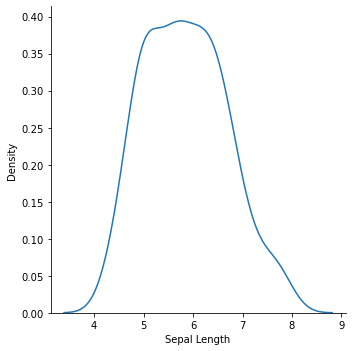

In [7]:
ax = sns.displot(iris['sepal_length'], kind="kde")
_ = ax.set(xlabel='Sepal Length', ylabel='Density')

    You can also plot distribution of sepal length related to each type of iris

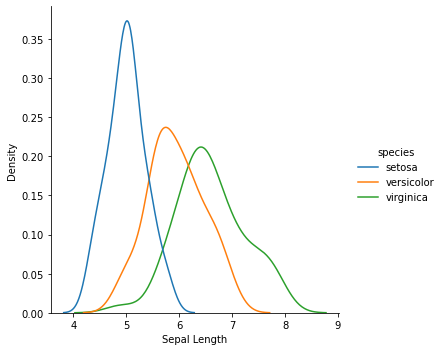

In [8]:
ax = sns.displot(iris, x="sepal_length", hue="species", kind="kde")
_ = ax.set(xlabel='Sepal Length', ylabel='Density')

### Cumulative Distribution

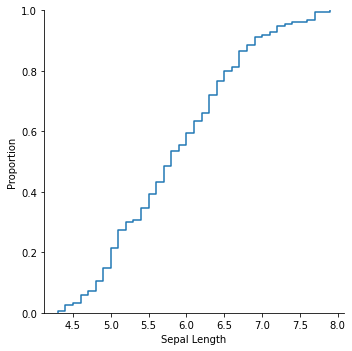

In [9]:
ax = sns.displot(iris, x="sepal_length", kind="ecdf")
_ = ax.set(xlabel='Sepal Length', ylabel='Proportion')

### Box Plot
A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

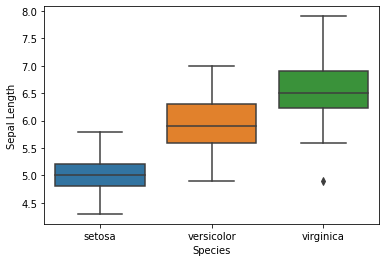

In [10]:
ax = sns.boxplot(x="species", y="sepal_length", data=iris)
_ = ax.set(ylabel='Sepal Length', xlabel='Species')

### Violet Plots
Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

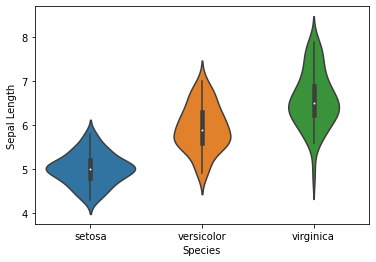

In [11]:
ax = sns.violinplot(x="species", y="sepal_length", data=iris)
_ = ax.set(ylabel='Sepal Length', xlabel='Species')

You can draw split violins to compare the across the `hue` variable

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


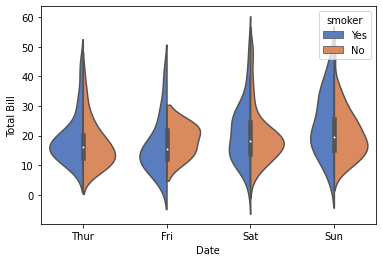

In [12]:
tips = sns.load_dataset("tips")
print(tips)
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted", split=True)
_ = ax.set(ylabel='Total Bill', xlabel='Date')

### Strip Plot
A strip plot can be used where you would like to show all observations along with some representation of the underlying distribution. For example, with a violin plot.

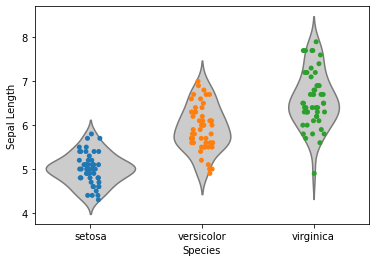

In [13]:
ax = sns.violinplot(x="species", y="sepal_length", data=iris,
                    inner=None, color=".8")
ax = sns.stripplot(x="species", y="sepal_length", data=iris)
_ = ax.set(ylabel='Sepal Length', xlabel='Species')

### Bar Plot
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 

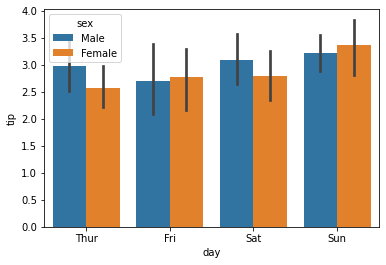

In [14]:
ax = sns.barplot(x="day", y="tip", hue="sex", data=tips)

### Scatter Plot

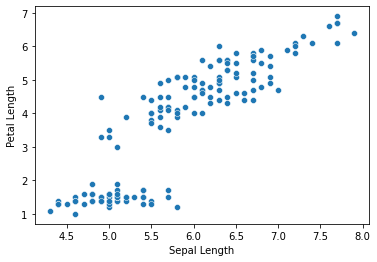

In [15]:
ax = sns.scatterplot(data=iris, x="sepal_length", y="petal_length")
_ = ax.set(xlabel='Sepal Length', ylabel='Petal Length')

    From the scatter plot we should expect a positive strong correlation between sepal length and petal length

In [16]:
print(stats.pearsonr(x=iris["sepal_length"], y=iris["petal_length"])[0]) # Person Correlation

0.8717537758865832


In [17]:
print(stats.spearmanr(a=iris["sepal_length"], b=iris["petal_length"])[0]) # Spearman Correlation

0.881898126434986


In [18]:
print(stats.kendalltau(x=iris["sepal_length"], y=iris["petal_length"])[0]) # Kendall Tau Correlation

0.7185159275387326


    To identify values from different species you can use the hue variable

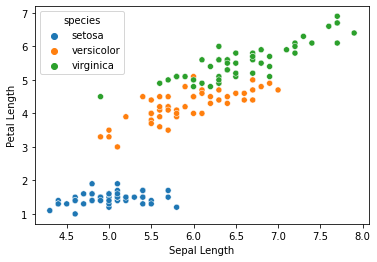

In [19]:
ax = sns.scatterplot(data=iris, x="sepal_length", y="petal_length", hue="species")
_ = ax.set(xlabel='Sepal Length', ylabel='Petal Length')

### Bivariate density plot

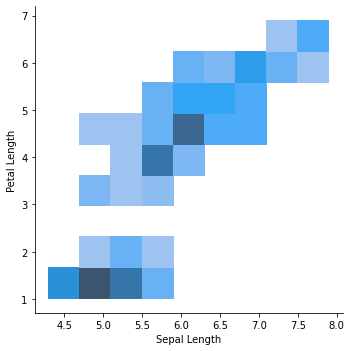

In [20]:
ax = sns.displot(iris, x="sepal_length", y="petal_length")
_ = ax.set(xlabel='Sepal Length', ylabel='Petal Length')

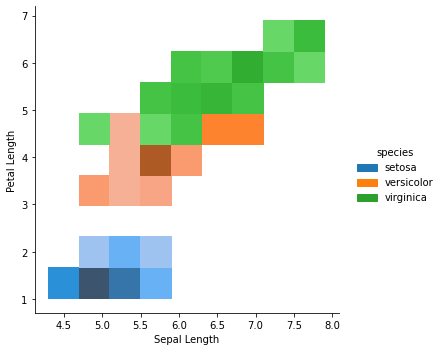

In [21]:
ax = sns.displot(iris, x="sepal_length", y="petal_length", hue = "species")
_ = ax.set(xlabel='Sepal Length', ylabel='Petal Length')

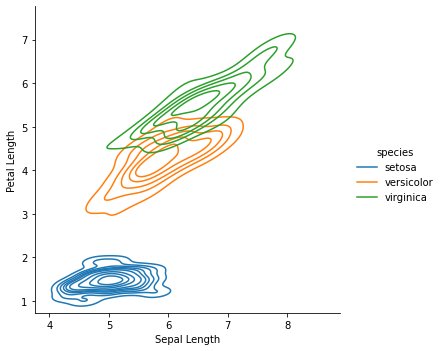

In [22]:
ax = sns.displot(iris, x="sepal_length", y="petal_length", hue = "species", kind="kde") # kernel density estimation
_ = ax.set(xlabel='Sepal Length', ylabel='Petal Length')

### Joint Plot

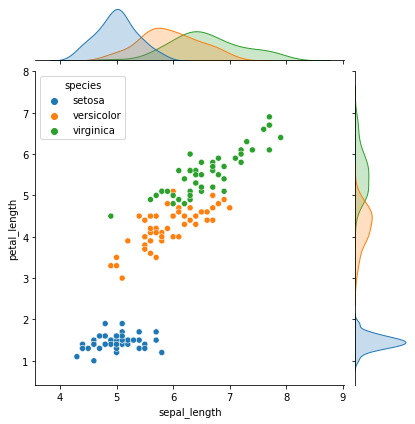

In [23]:
ax = sns.jointplot(data=iris, x="sepal_length", y="petal_length", hue="species")

### Scatter Matrix or Pair Plot

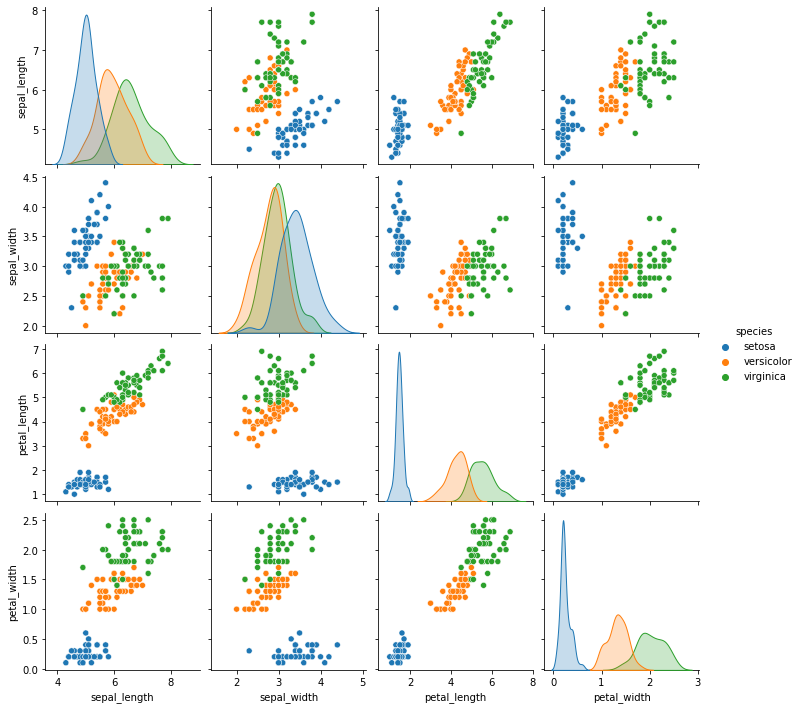

In [24]:
ax = sns.pairplot(iris, hue="species")

### Heat Map

In [25]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


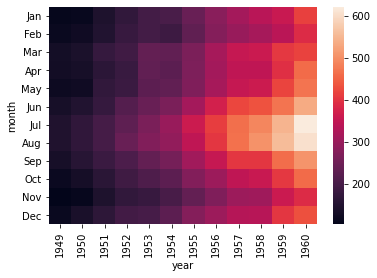

In [26]:
ax = sns.heatmap(flights)

### Line Plot

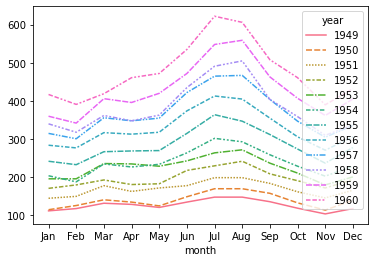

In [27]:
_ = sns.lineplot(data=flights)

### Pie Chart

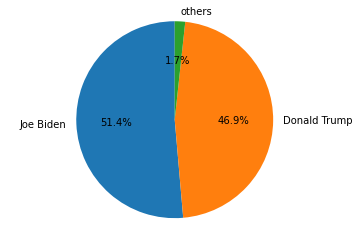

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Joe Biden', 'Donald Trump', 'others']

votes = [81283495, 74223755, 2704848]
# explode = (0.1, 0, 0) 
_ = plt.pie(votes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

## Exercise
1. Load the `flights` data set using `sns.load_dataset`. What will be the appropriate visualisation technique to visualise average passengers every year along with an indication of variability. Use an appropriate function to draw the graph [15]
2. Load the `penguins` data set using `sns.load_dataset`. Identify the variable which will have highest correlation with `body_mass_g` and why? You do not need to calculate the correlation. [25]
3. Using the `penguins` data set above, draw a box plot using the variable `bill_depth_mm` for different species of penguins. Identify the species you will be able to identify using `bill_depth_mm`. [20]
4. Compute [pairwise correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) (you can use default method e.g., `penguins.corr()` to calculate pairwise correlation) for the `penguins` data set and plot the heatmap. Can you identify the variables which are highly correlated? What is the correlation value along the diagonal and why? Do these results match your observation in question 2? [20]
5. Load the `fmri` data set using `sns.load_dataset`. Choose the appropriate graph to analyse `signal` against the `timpoints` for differnt regions. [20]